In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 200

In [3]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.8 MB/s eta 0:00:00


## This week’s topic: End of the humanities?

And so, not surprisingly, the number of Americans getting humanities degrees has dropped like a stone. This was the subject of [an article in the New Yorker](https://www.newyorker.com/magazine/2023/03/06/the-end-of-the-english-major) several weeks ago, called “The end of the English major.” Felix Salmon wrote about it in his [Axios column](https://www.axios.com/2023/03/04/studying-english-makes-little-sense), as well.

### Data

Our data for this week comes from the US Department of Education, which tracks a huge number of data points regarding universities — both the institutions and their students — in a program they call IPEDS, short for Integrated Postsecondary Education Data System. From the IPEDS site (https://nces.ed.gov/ipeds), you can select and retrieve a wide variety of information.

I chose to retrieve, from the Digest of Education Statistics, a table showing the total number of students majoring in each of 30 different areas of study. You can view the table at https://nces.ed.gov/programs/digest/d21/tables/dt21_322.10.asp. Better yet, you can download the file from:

https://nces.ed.gov/programs/digest/d21/tables/xls/tabn322.10.xls

### Tasks

Our questions for this week are:
1. Retrieve the Excel file with selected years, and turn it into a data frame.
2. Remove the line numbering the surveys. Remove the total. And remove the lines at the bottom, after "Other and not classified".
3. Remove the \n\ markings (for footnotes) from the "Field of study" column
4. Remove newlines and other extraneous whitespace from the "Field of study" column
5. Set the "Field of study" column to be the index.
6. Which majors have had the greatest *increase* since the survey began in 1970-1971?
7. Display the numbers with a comma before every three digits -- so that instead of showing "1000" it shows "1,000"
8. Which majors have had the greatest *decrease* since the survey began in 1970-1971?
9. If we only look at the last 10 years of the study (i.e., starting in 2010-11), do we see similar changes in majors?
10. What percentage decline do we see in all fields containing the word "art," "language," "history," or "culture" in their names in the last 10 years?

The learning goals for this week are include cleaning unwanted rows, cleaning string data, selecting columns, and working with axes.

#### 1. Retrieve the Excel file with selected years, and turn it into a data frame.

Table 322.10. Bachelor's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2019-20

In [51]:
url = "https://nces.ed.gov/programs/digest/d21/tables/xls/tabn322.10.xls"
df = pd.read_excel(url, header=1)

In [52]:
df.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
1,Total,839730.0,925746.0,935140.0,987823.0,1094538.0,1164792.0,1244171.0,1485104.0,1716053.0,1792163.0,1840381.0,1870150.0,1894969.0,1920750.0,1956114.0,1980665.0,2013086.0,2038431.0
2,Agriculture and natural resources\1\,12674.0,19402.0,21886.0,17191.0,13363.0,21757.0,23766.0,23497.0,29203.0,31629.0,34304.0,35953.0,37028.0,37827.0,38782.0,40334.0,41373.0,41848.0
3,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0,9045.0
4,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7733.0,7767.0


#### 2. Remove the line numbering the surveys. Remove the total. And remove the lines at the bottom, after "Other and not classified".

In [53]:
df = df.drop([0,1])

In [54]:
df.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
2,Agriculture and natural resources\1\,12674.0,19402.0,21886.0,17191.0,13363.0,21757.0,23766.0,23497.0,29203.0,31629.0,34304.0,35953.0,37028.0,37827.0,38782.0,40334.0,41373.0,41848.0
3,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0,9045.0
4,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7733.0,7767.0
5,Biological and biomedical sciences,35705.0,54154.0,43078.0,38395.0,39482.0,61014.0,60576.0,70602.0,89984.0,95850.0,100397.0,104657.0,109904.0,113794.0,116768.0,118661.0,121233.0,126590.0
6,Business\2\,115396.0,143171.0,200521.0,236700.0,249165.0,226623.0,263515.0,318043.0,365133.0,367235.0,360887.0,358132.0,363741.0,371690.0,381109.0,386240.0,390490.0,387851.0


In [55]:
df.tail(10)

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
30,Social sciences and history,155324.0,126396.0,100513.0,93840.0,125107.0,126479.0,128036.0,161468.0,177169.0,178534.0,177767.0,173132.0,166971.0,161211.0,159097.0,159962.0,160678.0,161164.0
31,Theology and religious vocations,3720.0,5490.0,5808.0,5510.0,4799.0,4933.0,6220.0,7687.0,7567.0,7845.0,7839.0,7865.0,7859.0,7826.0,7489.0,7252.0,7061.0,6855.0
32,Transportation and materials moving,0.0,225.0,263.0,1838.0,2622.0,3561.0,3748.0,5349.0,4941.0,4876.0,4661.0,4588.0,4730.0,4531.0,4708.0,4924.0,5051.0,5251.0
33,Visual and performing arts,30394.0,42138.0,40479.0,37241.0,42186.0,49296.0,61148.0,83292.0,93939.0,95806.0,97799.0,97414.0,95840.0,92979.0,91291.0,88507.0,89741.0,92332.0
34,Other and not classified,0.0,0.0,0.0,0.0,13258.0,1756.0,783.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,"\1\Includes Agricultural, animal, plant, veterinary science, and related fields; and Natural resources and conservation.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,"\2\Includes Business, management, marketing, and related support services; and Culinary, entertainment, and personal services.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,\3\Includes Engineering technologies and engineering-related fields; Construction trades; and Mechanic and repair technologies/technicians.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NOTE: Data in this table represent the 50 states and the District of Columbia. Data are for postsecondary institutions participating in Title IV federal financial aid programs. Data in this table ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"SOURCE: U.S. Department of Education, National Center for Education Statistics, Higher Education General Information Survey (HEGIS), ""Degrees and Other Formal Awards Conferred"" surveys, 1970-71 th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df = df.iloc[:-5]

In [57]:
df.tail(10)

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
25,Philosophy and religious studies,8149.0,8447.0,6776.0,6396.0,7423.0,7900.0,9442.0,12841.0,14336.0,14104.0,14338.0,13776.0,12925.0,12133.0,11740.0,11872.0,11981.0,11889.0
26,Physical sciences and science technologies,21410.0,21458.0,23936.0,21711.0,16334.0,19716.0,18025.0,20521.0,24705.0,26664.0,28053.0,29307.0,30042.0,30483.0,31272.0,31542.0,31155.0,30738.0
27,Precision production,0.0,0.0,0.0,2.0,2.0,12.0,31.0,55.0,43.0,37.0,36.0,37.0,48.0,51.0,32.0,45.0,47.0,39.0
28,Psychology,38187.0,50278.0,41068.0,40628.0,58655.0,73416.0,73645.0,88132.0,100906.0,109099.0,114446.0,117312.0,117573.0,117447.0,116859.0,116436.0,116550.0,119968.0
29,Public administration and social services,5466.0,15440.0,16707.0,11887.0,14350.0,19849.0,19447.0,21986.0,26799.0,29695.0,31950.0,33483.0,34364.0,34433.0,35461.0,35637.0,35104.0,34356.0
30,Social sciences and history,155324.0,126396.0,100513.0,93840.0,125107.0,126479.0,128036.0,161468.0,177169.0,178534.0,177767.0,173132.0,166971.0,161211.0,159097.0,159962.0,160678.0,161164.0
31,Theology and religious vocations,3720.0,5490.0,5808.0,5510.0,4799.0,4933.0,6220.0,7687.0,7567.0,7845.0,7839.0,7865.0,7859.0,7826.0,7489.0,7252.0,7061.0,6855.0
32,Transportation and materials moving,0.0,225.0,263.0,1838.0,2622.0,3561.0,3748.0,5349.0,4941.0,4876.0,4661.0,4588.0,4730.0,4531.0,4708.0,4924.0,5051.0,5251.0
33,Visual and performing arts,30394.0,42138.0,40479.0,37241.0,42186.0,49296.0,61148.0,83292.0,93939.0,95806.0,97799.0,97414.0,95840.0,92979.0,91291.0,88507.0,89741.0,92332.0
34,Other and not classified,0.0,0.0,0.0,0.0,13258.0,1756.0,783.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Remove the \n\ markings (for footnotes) from the "Field of study" column

In [58]:
df["Field of study"]

2                                Agriculture and natural resources\1\
3                                   Architecture and related services
4                   Area, ethnic, cultural, gender, and group studies
5                                  Biological and biomedical sciences
6                                                         Business\2\
7                    Communication, journalism, and related programs 
8                                        Communications technologies 
9         Computer and information sciences and support \n   services
10                                                          Education
11                                                        Engineering
12                                        Engineering technologies\3\
13                            English language and literature/letters
14                        Family and consumer sciences/human sciences
15                    Foreign languages, literatures, and linguistics
16                  

In [59]:
df["Field of study"] = df["Field of study"].str.replace(r"\\\d\\", "", regex=True)

In [60]:
df["Field of study"]

2                                   Agriculture and natural resources
3                                   Architecture and related services
4                   Area, ethnic, cultural, gender, and group studies
5                                  Biological and biomedical sciences
6                                                            Business
7                    Communication, journalism, and related programs 
8                                        Communications technologies 
9         Computer and information sciences and support \n   services
10                                                          Education
11                                                        Engineering
12                                           Engineering technologies
13                            English language and literature/letters
14                        Family and consumer sciences/human sciences
15                    Foreign languages, literatures, and linguistics
16                  

#### 4. Remove newlines and other extraneous whitespace from the "Field of study" column

In [61]:
df["Field of study"] = df["Field of study"].str.replace(r"\s+", " ", regex=True) # \s also covers \n

In [62]:
df["Field of study"]

2                               Agriculture and natural resources
3                               Architecture and related services
4               Area, ethnic, cultural, gender, and group studies
5                              Biological and biomedical sciences
6                                                        Business
7                Communication, journalism, and related programs 
8                                    Communications technologies 
9          Computer and information sciences and support services
10                                                      Education
11                                                    Engineering
12                                       Engineering technologies
13                        English language and literature/letters
14                    Family and consumer sciences/human sciences
15                Foreign languages, literatures, and linguistics
16                       Health professions and related programs 
17        

#### 5. Set the "Field of study" column to be the index.

In [63]:
df = df.set_index("Field of study")

In [64]:
df.head()

,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
Field of study,,,,,,,,,,,,,,,,,,
Agriculture and natural resources,12674.0,19402.0,21886.0,17191.0,13363.0,21757.0,23766.0,23497.0,29203.0,31629.0,34304.0,35953.0,37028.0,37827.0,38782.0,40334.0,41373.0,41848.0
Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0,9045.0
"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7733.0,7767.0
Biological and biomedical sciences,35705.0,54154.0,43078.0,38395.0,39482.0,61014.0,60576.0,70602.0,89984.0,95850.0,100397.0,104657.0,109904.0,113794.0,116768.0,118661.0,121233.0,126590.0
Business,115396.0,143171.0,200521.0,236700.0,249165.0,226623.0,263515.0,318043.0,365133.0,367235.0,360887.0,358132.0,363741.0,371690.0,381109.0,386240.0,390490.0,387851.0


#### 6. Which majors have had the greatest *increase* since the survey began in 1970-1971?

In [69]:
df["delta_2019_1970"] = df["2019-20"] - df["1970-71"]

Field of study
Business                                                  272455.0
Health professions and related programs                   232061.0
Computer and information sciences and support services     94659.0
Biological and biomedical sciences                         90885.0
Engineering                                                83298.0
Name: delta_2019_1970, dtype: float64

In [70]:
df["delta_2019_1970"].sort_values(ascending=False).head(5)

Field of study
Business                                                  272455.0
Health professions and related programs                   232061.0
Computer and information sciences and support services     94659.0
Biological and biomedical sciences                         90885.0
Engineering                                                83298.0
Name: delta_2019_1970, dtype: float64

<Axes: xlabel='Field of study'>

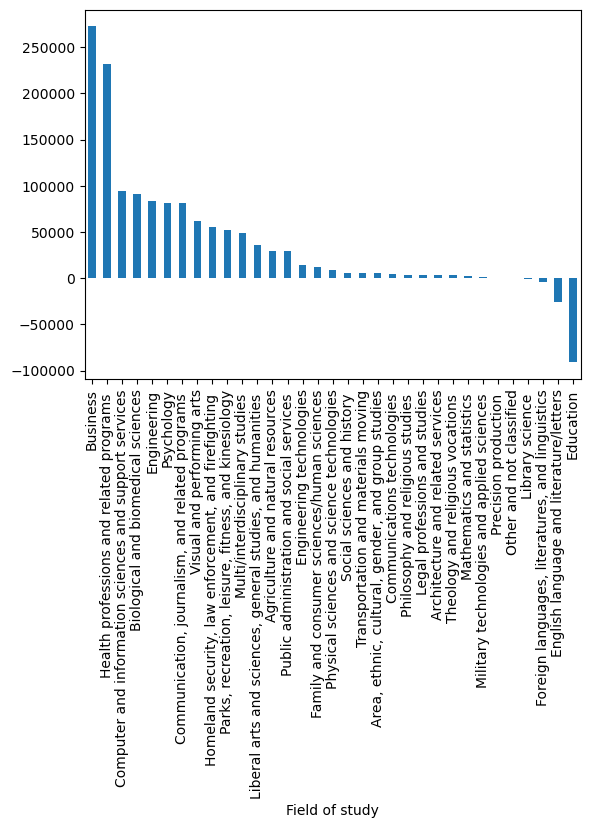

In [72]:
df["delta_2019_1970"].sort_values(ascending=False).plot.bar()

#### 7. Display the numbers with a comma before every three digits

In [77]:
df[["delta_2019_1970"]].sort_values("delta_2019_1970", ascending=False).head(5).style.format(thousands=",", precision=0)

,delta_2019_1970
Field of study,
Business,"272,455"
Health professions and related programs,"232,061"
Computer and information sciences and support services,"94,659"
Biological and biomedical sciences,"90,885"
Engineering,"83,298"


#### 8. Which majors have had the greatest decrease since the survey began in 1970-1971?

In [78]:
df[["delta_2019_1970"]].sort_values("delta_2019_1970", ascending=True).head(
    5
).style.format(thousands=",", precision=0)

,delta_2019_1970
Field of study,
Education,"-91,250"
English language and literature/letters,"-25,878"
"Foreign languages, literatures, and linguistics","-4,683"
Library science,-895
Other and not classified,0


#### 9. If we only look at the last 10 years of the study (i.e., starting in 2010-11), do we see similar changes in majors?

In [79]:
df["delta_2019_2010"] = df["2019-20"] - df["2010-11"]

In [80]:
df[["delta_2019_2010"]].sort_values("delta_2019_2010", ascending=False).head(
    5
).style.format(thousands=",", precision=0)

,delta_2019_2010
Field of study,
Health professions and related programs,"114,392"
Computer and information sciences and support services,"53,981"
Engineering,"51,976"
Biological and biomedical sciences,"36,606"
Business,"22,718"


In [81]:
df[["delta_2019_2010"]].sort_values("delta_2019_2010", ascending=True).head(
    5
).style.format(thousands=",", precision=0)

,delta_2019_2010
Field of study,
Education,"-18,951"
Social sciences and history,"-16,005"
English language and literature/letters,"-14,718"
"Foreign languages, literatures, and linguistics","-5,400"
"Liberal arts and sciences, general studies, and humanities","-3,814"


#### 10. What percentage decline do we see in all fields containing the word "art," "language," "history," or "culture" in their names in the last 10 years?

In [96]:
df_humanities = df.filter(regex=r"art|language|history|\bculture", axis="index")[
    ["2019-20", "2010-11", "delta_2019_2010"]
].sort_values("delta_2019_2010", ascending=False)

df_humanities["pct_change"] = (df_humanities[["2010-11", "2019-20"]].pct_change(axis="columns") * 100)["2019-20"]

In [106]:
df_humanities.sort_values("pct_change", ascending=True).style.format(precision=0).format( formatter="{:.2f}%", subset=["pct_change"])

,2019-20,2010-11,delta_2019_2010,pct_change
Field of study,,,,
English language and literature/letters,38036,52754,-14718,-27.90%
"Foreign languages, literatures, and linguistics",16305,21705,-5400,-24.88%
Social sciences and history,161164,177169,-16005,-9.03%
"Liberal arts and sciences, general studies, and humanities",42903,46717,-3814,-8.16%
Visual and performing arts,92332,93939,-1607,-1.71%
